## Very Basic of Simple Linear Regression

#### Before we speak about the Linear Regression, let us understand what Regression is?
Regression is a technique for determining the statistical relationship between two or more variables where a change in a dependent variable is associated with, and depends on, a change in one or more independent variables.

Linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).

Let me explain using the independent variable and dependent variable. The example is about the Tip amount and bill generated in the hotel. We have list of data for the Tip amount and now using the linear regression you will be predicting next Tip. 

In [2]:
TipAmount = [10,20,5,25,8,10]

#### We have six customers who payed the tip amount in rupees. Now I want to predict the next tip. At this situation it will be difficult to predict but we need to predict there is no go. Let us view this data in the graph.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
serialno = [1,2,3,4,5,6]
means = [np.mean(TipAmount) for i in range(len(serialno))]
plt.scatter(serialno, TipAmount , alpha=0.5)
plt.title('Scatter plot if only we have the Tip Amount')
plt.xlabel('Serial No')
plt.ylabel('Tip Amount in Rs')
plt.plot(serialno,means,"r--")


plt.show()

## So the best value for next tip that we can provide is mean of entire tips collection. So the value is 13.0 we expect the next tip amount. 
We say approximately that  the tip amount is 13 but we are not right so let us find the error of this tip collection. If we measure the distance between point and mean will provide the error of the first point so these values are called Residuals. When we add up these residual it will turn to 0. We square these residuals and add up which will provide the Sum  of Squared Error or this can be called as sum of squared residuals. We will see all this in the following section 

In [4]:
residualError = [x - np.mean(TipAmount) for x in TipAmount]#We got the residual error for the Tip Amount
print('We have residual error i.e, distance from each point to mean ',residualError)
print('As we said earlier when we add up the value will be zero of the Residual Error :', sum(residualError))
residSquaredError = [error**2 for error in residualError]
print('Therefore the sum of squared error is ', sum(residSquaredError))

We have residual error i.e, distance from each point to mean  [-3.0, 7.0, -8.0, 12.0, -5.0, -3.0]
As we said earlier when we add up the value will be zero of the Residual Error : 0.0
Therefore the sum of squared error is  300.0


### Sum of Squared Error is 300. Our objective in linear is to minimize the sum of squared error using the linear regression. How can we do this?
We can do this by introducing another independent variable. 
Before we introduce to the independent let us look at the line algebraic equation.
#### y = mx + c
So x is the independent variable in our case it would be bill amount, y is the dependent variable (Tip Amount), m is the slope of the given data point and c is the y-intercept of line.
Slope here means rise/run. Y-intercept means the line crossing in the y axis.

This can be written as below b0 is the slope and b1 is the y-intercept.
$$y`= b{0} + b{1}x$$

Let me introduce to you with Bill Amount data

In [5]:
BillAmount = [120,150,50,175,75,132]

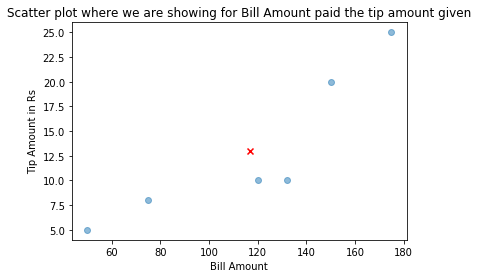

In [6]:
plt.scatter(BillAmount, TipAmount , alpha=0.5)
plt.title('Scatter plot where we are showing for Bill Amount paid the tip amount given')
plt.xlabel('Bill Amount')
plt.ylabel('Tip Amount in Rs')

plt.scatter(np.mean(BillAmount), np.mean(TipAmount), marker="x", color='r')
plt.show()

Above plot shows that for Bill Amount paid the Tip Amount given. The graph show that for the higher bill amount the higher tip is provided.You can see that a x mark which is the centroid of this plot. Centroid means the mean of Bill Amount and Tip Amount plotted in the graph. To reduce the sum of squared errors the line has to pass through the centroid.

When we had only the TipAmount the best fit line was the mean of the Tip Amount. Now introducing the Bill Amount the best fit line has to be calculated. To calculate the best fit line we need to use the line equation. Now we need to calculate the slope (b1) and y-intercept (b0). To calculate y-intercept we need to first calculate slope. Below is the algebraic equation for the slope

$$b{1}=\sum_{i}^n\frac{(x_{i}-\bar x)(y_{i}-\bar y)}{(x_i - \bar x)^2}$$
To calculate the y-intercept $b{0}$ below is the formula
$$b{0}=\bar y - b{1}\bar x$$


We will calculate this in the code. To do this we need to calculate the deviations of bill amount and tip amount. Now let us find the slope 

In [7]:
deviationsBillAmount = [x-np.mean(BillAmount) for x in BillAmount]
deviationsTipAmount = [y-np.mean(TipAmount) for y in TipAmount]
deviationBillAmountSquare = [x**2 for x in deviationsBillAmount]
productDeviations = [deviationsBillAmount[i] * deviationsTipAmount[i] for i in range(len(deviationsTipAmount))]
slope = sum(productDeviations)/sum(deviationBillAmountSquare)
print('Slope of line for this data is :', slope)

Slope of line for this data is : 0.1479890310786106


Now we will find the Y-intercept of line for given dataset.

In [8]:
yintercept = np.mean(TipAmount) - slope * np.mean(BillAmount)
print('Y-Intercept of line for this data is :', yintercept)

Y-Intercept of line for this data is : -4.314716636197442


So we have the slope and yintercept value.Now if we substitute values to the linear equation we will have below results.
$$y^` = -4.3147 + 0.1479 x$$

This means that for every bill amount 1 rupee increase we would find the tip increase in 0.1479 paise. If bill amount is 0 then the tip amount is -4.3147. Let us calculate the tip amount based on this equation.

In [9]:
yhat = [yintercept + slope * x for x in BillAmount]

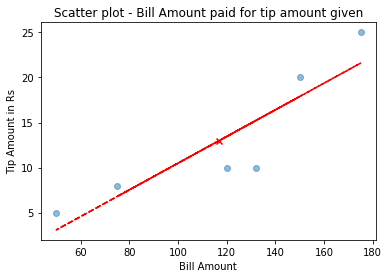

In [10]:
plt.scatter(BillAmount, TipAmount , alpha=0.5)
plt.title('Scatter plot - Bill Amount paid for tip amount given')
plt.xlabel('Bill Amount')
plt.ylabel('Tip Amount in Rs')

plt.scatter(np.mean(BillAmount), np.mean(TipAmount), marker="x", color='r')
plt.plot(BillAmount,yhat,"r--")
plt.show()

In above graph you can see that line passing through the centroid. If we calculate the sum of squared errors for this line we will see that the sum of squared errors is reduced. Let us examine below

In [11]:
SSE = [(TipAmount[i] - yhat[i])**2 for i in range(len(TipAmount))]
print('Now the sum of squared error due to regression is ', sum(SSE))

Now the sum of squared error due to regression is  60.40575868372944


So our basic objective has been achieved so when we had only the tip amount then Sum of Squared error was 300 and when we introduced independent variable then sum of squared error is 60. We can call the sum of squared error for only Tip Amount as the sum of squared total(SST). Therefore
$$SST = SSR + SSE $$
$$SSR = SST - SSE $$
Here $SSR$ is Sum of Squared due to Regression, $SST$ is Sum of Squared Total and $SSE$ is the Sum of Squared Error. 

In [12]:
SSR = sum(residSquaredError) - sum(SSE)
print('Sum of Squared  due to Regression is ',SSR)

Sum of Squared  due to Regression is  239.59424131627057


So now let us find the how this line is the good fit for predicting the values. This is called the coefficient of determination of the good fit line. Now how of our estimated regression equation fit our data can be found through coefficient.
$$ Coefficient of Determination = r^2 = \frac{SSR}{SST}$$

In [13]:
coDet = SSR/sum(residSquaredError)
print('We can conclude that ',(coDet * 100),'% of the total sum of squares can be explained by estimated regression equation to predict the tip amount')
print('The remainder of this is error i.e., ', 100 -(coDet * 100))

We can conclude that  79.86474710542353 % of the total sum of squares can be explained by estimated regression equation to predict the tip amount
The remainder of this is error i.e.,  20.135252894576467


Therefore the formula of the $SST$ is
$$ SST = \sum_{i}^n(y_i - \bar y)^2 $$ 
and the formula for $SSE$ is 
$$ SSE = \sum_{i}^n(y_i -y')^2 $$ 

This is the equation for the estimated regression to determine coefficient of determination. 

## Regression of Standard Score

We will calculate the standard scores for each of the data. To calculate standard score
$$ z_{x_i} = \frac{x_i - \bar x}{\sigma_ x}$$ 
Here each value is calculated by subtracting with mean and divided by standard deviation. Below are standard scores calculated for BillAmount and TipAmount

In [14]:
stdTipAmount = np.std(TipAmount)
stdBillAmount = np.std(BillAmount)
meanTipAmount = np.mean(TipAmount)
meanBillAmount = np.mean(BillAmount)
zscoresBillAmount = [(x - meanBillAmount)/stdBillAmount for x in BillAmount]
zscoresTipAmount = [(x - meanTipAmount)/stdTipAmount for x in TipAmount]
print('The standard scores for the Bill Amount are ',zscoresBillAmount)
print('The standard scores for the Tip Amount are ',zscoresTipAmount)

The standard scores for the Bill Amount are  [0.07025677636519141, 0.7728245400171055, -1.569068005489275, 1.3582976763937007, -0.9835948691126798, 0.35128388182595705]
The standard scores for the Tip Amount are  [-0.4242640687119285, 0.9899494936611665, -1.131370849898476, 1.697056274847714, -0.7071067811865475, -0.4242640687119285]


### We interpret this information as Bill Amount of 120 is 0.07 standard deviation away from the mean. Same way this is interpreted for the Tip Amount. We can see this in our normal distribution wave as shown below.

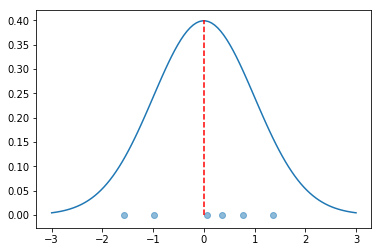

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
y = [0,0,0,0,0,0]
plt.plot([0,0,0,0,0,0,0,0,0],[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40],'r--')
plt.scatter(zscoresBillAmount,y,alpha=0.5)
plt.show()


Above graph shows the standard score points in the normal distribution for the Bill Amount. I will show below the standard scores for Tip Amount in the normal distribution.

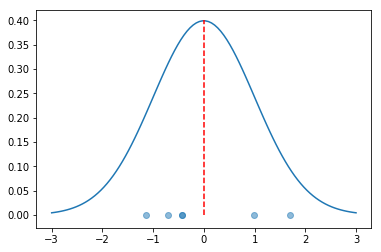

In [16]:
plt.plot(x,mlab.normpdf(x, mu, sigma))
y = [0,0,0,0,0,0]
plt.plot([0,0,0,0,0,0,0,0,0],[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40],'r--')
plt.scatter(zscoresTipAmount,y,alpha=0.5)
plt.show()

We will check the correlation of the raw data and standard scores of data. We will see that correlation is same.

In [17]:
print('Corelation of the raw data is ',np.corrcoef(BillAmount,TipAmount)[0,1])
print('Corelation of the standard scores of data is ',np.corrcoef(zscoresBillAmount,zscoresTipAmount)[0,1])

Corelation of the raw data is  0.8936707844918257
Corelation of the standard scores of data is  0.8936707844918257


This is one of the observation. We will see other observation in calculating the slope of the regression line. We will compare the earlier calculated slope with slope calculated through corelation.
$$ {Regression Slope} = {pearson correlation} \times \frac{SD of y}{SD of x} $$

In [18]:
rSlope = np.corrcoef(BillAmount,TipAmount)[0,1] * (np.std(TipAmount)/np.std(BillAmount))
print('Earlier we had calculated the slope of regression line, the value is ',slope)
print('Now we have calculated the slope of regression line using correlation, the value is ',slope)

Earlier we had calculated the slope of regression line, the value is  0.1479890310786106
Now we have calculated the slope of regression line using correlation, the value is  0.1479890310786106


Above we can see that slope values are same. Same way we can calculate the correlation. 

## Mean Squared Error

We will calculate the Mean Squared error for the regression estimation we have made. Below is the equation for calculating
$$ {MSE} = \frac{SSE}{n}$$
Here the SSE is the Sum of Squared Error and the n-2 is the degrees of freedom as we are using sample and 2 because we are calculating the slope and Intercept. We will now see through code the value.


In [46]:
n = len(BillAmount)
MSE = sum(SSE)/(n)
print('Mean Squared Error of this regression estimation is ', MSE )

Mean Squared Error of this regression estimation is  10.067626447288239


## Standard Error of this regression estimation.
To calculate the standard error of this estiamtion the equation is as below:
$$z_{error} = \sqrt{MSE} $$
The Standard error is also called as root mean square error.


In [47]:
print('Root Mean Square Error of the regression Estimation is ',math.sqrt(MSE))

Root Mean Square Error of the regression Estimation is  3.172952323513267


Now few questions on the 
1. How much variance in the dependent variable is explained by model/ independent variable?
   we look for the value $r^2$ or Adjusted-$r^2$
2. Does a statistically significiant linear relationship exist between independent variable and dependent variable?

   a. Is the overall F-test or t-test significant?

   b. Can we reject the null hypothesis that the slope $b1$ of Regression line is ZERO?
   
   c. Does the confidence interval for the slope $b1$ contain zero?

The standard error of estimate is the standard deviation of the error term. Since MSE is $\sigma^2$, the standard error is square root of MSE.
$$s = \sqrt{MSE} = \sqrt\frac{SSE}{n}$$

## Confidence interval of slope
We have learnt in earlier textbooks that we use mean for confidence interval. This means for 95% of confident mean lies in the range of calculated value of the population. Interms of slope we can say that for 95% confident of slope lies in range of calculated value of the population. To calculate this we have following formula
$${b1}\pm {t_{\alpha/2}}\times{s_{b1}}$$
We know this much clear that $b1$ is slope of Regression and $t_{\alpha/2}\times{s_{b1}}$ is the margin of error.
In margin of error we have t-value for 95% confident which are standardize which we look in books for degrees of freedom 2 and 95% confident interval what is the value. $s_{b1}$ is the standard deviation of the slope.
To calculate standard deviation of slope below is the formula
$$s_{b1}=\frac{s}{\sqrt{\sum_{i=0}^n(x_i - \bar x)^2}}$$
Here s is the standard error. We will calculate the standard deviation of slope.

In [21]:
SDSlope = math.sqrt(MSE)/math.sqrt(sum(deviationBillAmountSquare))
print('Standard deviation of Slope is ',SDSlope)
print('t-value for the 95% confidence in t distribution table is 2.776') 

Standard deviation of Slope is  0.03715356696841435
t-value for the 95% confidence in t distribution table is 2.776


We will calculate the range of the slope that will be in the population for 95% confidence interval.

In [22]:
range1 = slope + 2.776 * SDSlope
range2 = slope - 2.776 * SDSlope
print('So we can say with 95% confidence the slope of population in this range (',range2,',',range1,')')

So we can say with 95% confidence the slope of population in this range ( 0.04485072917429239 , 0.25112733298292883 )


We are 95% confident that interval (0.04485,0.251127) contains the true slope of the regression line.
So now does this interval contains zero?
No
So we can reject that null hypothesis that slope contains zero. So we have the proof as interval which proves that interval does not contain zero. The alternate hypothesis is accepted.

### Therefore null hypothesis is the slope of regression line contains zero, then there is no significant relationship. But in our case there is no zero.
$$ t_{statistic} = \frac{b1}{s_{b1}}$$

In [23]:
tstatistic = slope/ SDSlope
print('We can see that t statistic is greater than t critical i.e,', tstatistic,'> 2.7776')
print('Therefore we can say that our t value is significant because our t value greater the critical value')


We can see that t statistic is greater than t critical i.e, 3.9831715540104584 > 2.7776
Therefore we can say that our t value is significant because our t value greater the critical value


   Bill  Tip
0   120   10
1   150   20
2    50    5
3   175   25
4    75    8
5   132   10


In [37]:
import pandas as pd
#valk = np.array(BillAmount)
#df = pd.DataFrame(values=valk)
#valk
df = pd.DataFrame({'Bill':BillAmount,'Tip':TipAmount})
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [38]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
print(regressor.intercept_) 

-4.314716636197442


In [40]:
print(regressor.coef_)

[0.14798903]


In [41]:
print(yintercept)

-4.314716636197442


In [43]:
print(slope)

0.1479890310786106


In [44]:
y_pred = regressor.predict(X) 

In [45]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 2.8879341864716643
Mean Squared Error: 10.067626447288239
Root Mean Squared Error: 3.172952323513267
